In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np

import cv2
import os

import keras
from keras.models import Sequential
from keras.layers import Dense, Conv2D , MaxPool2D , Flatten , Dropout 

import tensorflow as tf
from sklearn.metrics import classification_report, confusion_matrix

In [ ]:
labels = ['Cars', 'Bikes']
img_size = 64

def get_data(data_dir):
    data = []
    for label in labels:
        path = os.path.join(data_dir, label)
        class_num = labels.index(label)
        for img in os.listdir(path):
            try:
                img_arr = cv2.imread(os.path.join(path, img))
                resized_arr = cv2.resize(img_arr, (img_size, img_size)) # Reshaping images to preferred size
                data.append([resized_arr, class_num])
            except Exception as e:
                print(e)
    return np.array(data)

In [ ]:
train = get_data('/content/drive/MyDrive/Vehicle/Train')
test = get_data('/content/drive/MyDrive/Vehicle/Test')

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:16: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray
  app.launch_new_instance()


In [ ]:
print(train.shape, test.shape)

(400, 2) (100, 2)


/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


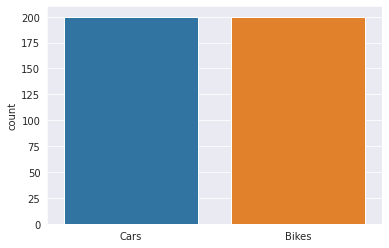

In [ ]:
l = []
for i in train:
    if(i[1] == 0):
      l.append("Cars")
    else:
      l.append("Bikes")
sns.set_style('darkgrid')
sns.countplot(l)

Text(0.5, 1.0, 'Cars')

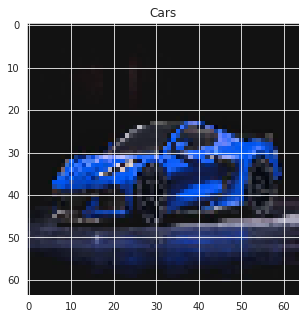

In [ ]:
plt.figure(figsize = (5,5))
plt.imshow(train[1][0])
plt.title(labels[train[0][1]])

Text(0.5, 1.0, 'Bikes')

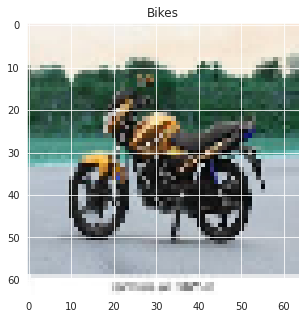

In [ ]:
plt.figure(figsize = (5,5))
plt.imshow(train[-1][0])
plt.title(labels[train[-1][1]])

In [ ]:
x_train = []
y_train = []
x_test = []
y_test = []

for feature, label in train:
  x_train.append(feature)
  y_train.append(label)

for feature, label in test:
  x_test.append(feature)
  y_test.append(label)

# Normalizing the data
x_train = np.array(x_train) / 255
x_test = np.array(x_test) / 255

x_train.reshape(-1, img_size, img_size, 1)
y_train = np.array(y_train)

x_test.reshape(-1, img_size, img_size, 1)
y_test = np.array(y_test)

In [ ]:
from keras.preprocessing.image import ImageDataGenerator

datagen = ImageDataGenerator(
        featurewise_center=False,             # set input mean to 0 over the dataset
        samplewise_center=False,              # set each sample mean to 0
        featurewise_std_normalization=False,  # divide inputs by std of the dataset
        samplewise_std_normalization=False,   # divide each input by its std
        zca_whitening=False,                  # apply ZCA whitening
        rotation_range = 30,                  # randomly rotate images in the range
        zoom_range = 0.2,                     # Randomly zoom image 
        width_shift_range=0.1,                # randomly shift images horizontally
        height_shift_range=0.1,               # randomly shift images vertically
        horizontal_flip = True,               # randomly flip images
        vertical_flip=False)                  # randomly flip images

datagen.fit(x_train)
x_train.shape

(400, 64, 64, 3)

In [ ]:
model = Sequential()
model.add(Conv2D(32, 3, padding="same", activation="relu", input_shape=(64,64,3)))
model.add(MaxPool2D())

model.add(Conv2D(32, 3, padding="same", activation="relu"))
model.add(MaxPool2D())

model.add(Conv2D(64, 3, padding="same", activation="relu"))
model.add(MaxPool2D())
model.add(Dropout(0.4))

model.add(Flatten())
model.add(Dense(32,activation="relu"))
model.add(Dense(2, activation="softmax"))

model.summary()

Model: "sequential_20"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_45 (Conv2D)           (None, 64, 64, 32)        896       
_________________________________________________________________
max_pooling2d_45 (MaxPooling (None, 32, 32, 32)        0         
_________________________________________________________________
conv2d_46 (Conv2D)           (None, 32, 32, 32)        9248      
_________________________________________________________________
max_pooling2d_46 (MaxPooling (None, 16, 16, 32)        0         
_________________________________________________________________
conv2d_47 (Conv2D)           (None, 16, 16, 64)        18496     
_________________________________________________________________
max_pooling2d_47 (MaxPooling (None, 8, 8, 64)          0         
_________________________________________________________________
dropout_15 (Dropout)         (None, 8, 8, 64)        

In [ ]:
model.compile(optimizer = 'adam', loss = 'sparse_categorical_crossentropy', metrics = ['accuracy'])

In [ ]:
history = model.fit(x_train, y_train, epochs = 100, validation_data = (x_test, y_test))

Epoch 1/100
13/13 [==============================] - 3s 198ms/step - loss: 0.7351 - accuracy: 0.4700 - val_loss: 0.6909 - val_accuracy: 0.5000
Epoch 2/100
13/13 [==============================] - 2s 182ms/step - loss: 0.6907 - accuracy: 0.5850 - val_loss: 0.6869 - val_accuracy: 0.6500
Epoch 3/100
13/13 [==============================] - 2s 181ms/step - loss: 0.6793 - accuracy: 0.5900 - val_loss: 0.6675 - val_accuracy: 0.5100
Epoch 4/100
13/13 [==============================] - 2s 179ms/step - loss: 0.6588 - accuracy: 0.5650 - val_loss: 0.6234 - val_accuracy: 0.5800
Epoch 5/100
13/13 [==============================] - 2s 182ms/step - loss: 0.5620 - accuracy: 0.7275 - val_loss: 0.4913 - val_accuracy: 0.7400
Epoch 6/100
13/13 [==============================] - 2s 182ms/step - loss: 0.4348 - accuracy: 0.7975 - val_loss: 0.3479 - val_accuracy: 0.8800
Epoch 7/100
13/13 [==============================] - 2s 180ms/step - loss: 0.3250 - accuracy: 0.8525 - val_loss: 0.3107 - val_accuracy: 0.8600

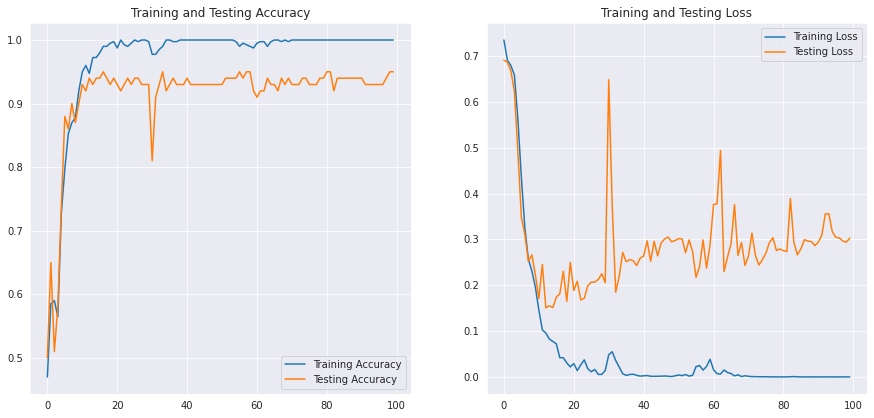

In [ ]:
acc = history.history['accuracy']
test_acc = history.history['val_accuracy']

loss = history.history['loss']
test_loss = history.history['val_loss']

epochs_range = range(100)
plt.figure(figsize=(15, 15))

plt.subplot(2, 2, 1)
plt.plot(epochs_range, acc, label='Training Accuracy')
plt.plot(epochs_range, test_acc, label='Testing Accuracy')
plt.legend(loc='lower right')
plt.title('Training and Testing Accuracy')

plt.subplot(2, 2, 2)
plt.plot(epochs_range, loss, label='Training Loss')
plt.plot(epochs_range, test_loss, label='Testing Loss')
plt.legend(loc='upper right')
plt.title('Training and Testing Loss')
plt.show()

In [ ]:
model.evaluate(x_test,y_test)

4/4 [==============================] - 0s 38ms/step - loss: 0.3029 - accuracy: 0.9500


[0.3028861880302429, 0.949999988079071]

In [ ]:
pred=model.predict(x_test)

print(pred[0])                         #printing the first element from predicted data

print('Index:',np.argmax(pred[0]))     #printing the index of 

[1.0000000e+00 1.3260205e-12]
Index: 0


In [ ]:
y_classes = [np.argmax(element) for element in pred]
print('Predicted_values:',y_classes[:10])
print('Actual_values:',y_test[:10])

Predicted_values: [0, 0, 0, 0, 0, 0, 0, 0, 0, 0]
Actual_values: [0 0 0 0 0 0 0 0 0 0]


In [ ]:
print(classification_report(y_test, y_classes, target_names = ['Bikes(0)','Cars(1)']))

              precision    recall  f1-score   support

    Bikes(0)       0.94      0.96      0.95        50
     Cars(1)       0.96      0.94      0.95        50

    accuracy                           0.95       100
   macro avg       0.95      0.95      0.95       100
weighted avg       0.95      0.95      0.95       100



In [ ]:
from keras.models import load_model
from keras.preprocessing.image import load_img
from keras.preprocessing.image import img_to_array
import numpy as np

(0 - Bikes , 1 - Cars)
Predicted Class:  1


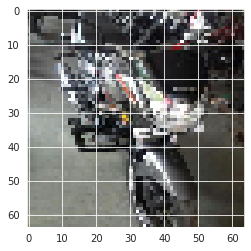

In [ ]:
image = load_img('/content/drive/MyDrive/Sample Vehicle/Bike-1.jpg', target_size=(64, 64))
img = np.array(image)
img = img / 255
img = img.reshape(1,64,64,3)
label = model.predict(img)
plt.imshow(image)
print('(0 - Bikes , 1 - Cars)')
print("Predicted Class: ", int(np.round(label[0][0])))

(0 - Bikes , 1 - Cars)
Predicted Class:  1


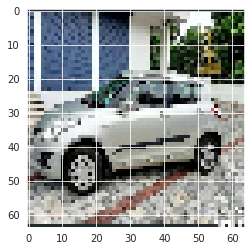

In [ ]:
image = load_img('/content/drive/MyDrive/Sample Vehicle/Cars-3.jpg', target_size=(64, 64))
img = np.array(image)
img = img / 255
img = img.reshape(1,64,64,3)
label = model.predict(img)
print('(0 - Bikes , 1 - Cars)')
print("Predicted Class: ", int(np.round(label[0][0])))
plt.imshow(image)